## Math 215 Programming Assignment 4 Template  (40 points)

Rename this notebook properly. Use Anaconda for this PA.

## Problem 1 (12 points)  

Complete the implementation of a `Circle` class.

*  Constructor:  `def __init__(self, center_x = 0, center_y = 0, radius = 0):`

*  String method:  `def __str__(self)`

*  Area:  `def area(self)`

*  Contains:  `def contains(self, other)`:

*  Intersects:  `def intersects(self, other)`:

*  Less Than:  `def __lt__(self, other):`  Compare based on the circle's radius



In [ ]:
import math

class Circle:
    def __init__(self, center_x = 0, center_y = 0, radius = 0):
        #print('To do: implement constructor')
        self.center_x = center_x
        self.center_y = center_y
        self.radius = radius

    def __str__(self):
        #print('To do: implement string method')
        return f"Circle with center ({self.center_x},{self.center_y}) with radius {self.radius}."

    def area(self):
        #print('To do: implement area')
        return (math.pi * (self.radius ** 2))

    def intersects(self, other):
        #print('To do: implement intersects')
        if self.center_x < other.center_x:
          if (self.center_x + self.radius) > other.center_x:
            if self.center_y < other.center_y:
              if (self.center_y + self.radius) > other.center_y:
                return True
            elif self.center_y > other.center_y:
              if (self.center_y - self.radius) < other.center_y:
                return True
        elif self.center_x > other.center_x:
          if (self.center_x - self.radius) < other.center_x:
            if self.center_y < other.center_y:
              if (self.center_y + self.radius) > other.center_y:
                return True
            elif self.center_y > other.center_y:
              if (self.center_y - self.radius) < other.center_y:
                return True
        elif self.center_x == other.center_x:
          return True
        elif self.center_y == other.center_y:
          return True
        return False

    def contains(self, other):
        if self.center_x < other.center_x:
          if (self.center_x + self.radius) > (other.center_x+other.radius):
            if self.center_y < other.center_y:
              if (self.center_y + self.radius) > (other.center_y+other.radius):
                return True
            elif self.center_y > other.center_y:
              if (self.center_y - self.radius) < (other.center_y-other.radius):
                return True
        elif self.center_x > other.center_x:
          if (self.center_x - self.radius) < (other.center_x+other.radius):
            if self.center_y < other.center_y:
              if (self.center_y + self.radius) > (other.center_y+other.radius):
                return True
            elif self.center_y > other.center_y:
              if (self.center_y - self.radius) < (other.center_y - other.radius):
                return True
        if self.center_x == other.center_x:
          if self.radius >= other.radius:
            return True
        if self.center_y == other.center_y:
          if self.radius >= other.radius:
            return True
        return False

    def __lt__(self, other):
    # compare by radius
        if self.radius < other.radius:
          return True
        return False



Testing code for Circle class.  Run the following cell without modification.






In [ ]:
#Testing code for Circle class
circle_list = []
n = 2
circle_list = [Circle(1, 1, 1), Circle(2, 1, 0.5), Circle(6, 6, 1), Circle(7, 6, 3), Circle(10, 10, 10), Circle(10, 10, 20)]

print(f'Testing constructor, __str__ and area')
for c in circle_list:
    print(f'\t{c} has area {c.area():.2f}')

print('\nTesting contains:', end = '')
for c1 in circle_list:
    print(f'\n\t{c1}. Results for contains:')
    print('\t\t', end = '')
    for c2 in circle_list:
        print(c1.contains(c2), end = ' ')
    print()

print('\nTesting intersects:', end = '')
for c1 in circle_list:
    print(f'\n\t{c1}.  Results for  intersects:')
    print('\t\t', end = '')
    for c2 in circle_list:
        print(c1.intersects(c2), end = ' ')
    print()

print(f'\nTesting less than with a reverse order sort')
circles_in_decreasing_order = sorted(circle_list, reverse = True)
for c in sorted(circle_list, reverse = True):
    print(f'\t{c}')

Testing constructor, __str__ and area
	Circle with center (1,1) with radius 1. has area 3.14
	Circle with center (2,1) with radius 0.5. has area 0.79
	Circle with center (6,6) with radius 1. has area 3.14
	Circle with center (7,6) with radius 3. has area 28.27
	Circle with center (10,10) with radius 10. has area 314.16
	Circle with center (10,10) with radius 20. has area 1256.64

Testing contains:
	Circle with center (1,1) with radius 1.. Results for contains:
		True True False False False False 

	Circle with center (2,1) with radius 0.5.. Results for contains:
		False True False False False False 

	Circle with center (6,6) with radius 1.. Results for contains:
		False False True False False False 

	Circle with center (7,6) with radius 3.. Results for contains:
		False False True True False False 

	Circle with center (10,10) with radius 10.. Results for contains:
		False True True True True False 

	Circle with center (10,10) with radius 20.. Results for contains:
		True True True 

## Problem 2  (6 points)  

Write an application that uses your Circle class.  

Complete each of the following tasks:

2.1  Create 10 concentric circles

2.2  Make a visual display of the circles using `matplotlib.pyplot`.  Draw your circle in different colors with the largest one drawn first



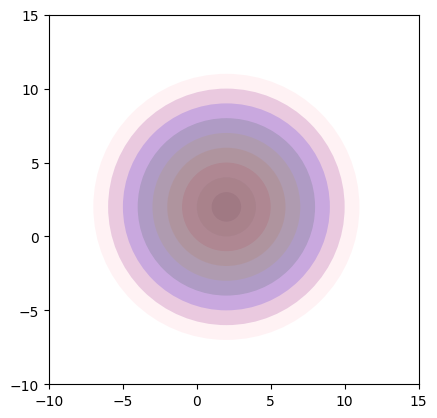

In [ ]:
import matplotlib.pyplot as plt

#define Matplotlib figure and axis
fig, axes = plt.subplots()

axes.set_aspect( 1 )
axes.set_xlim(-10, 15)
axes.set_ylim(-10, 15)

colors = ['brown','black','grey','red','orange','yellow','green','blue','purple','pink']
#add circle to plot
for n in range(10):
  axes.add_patch(plt.Circle((2, 2), n,
                #edgecolor = 'red',
                facecolor = colors[n],
                alpha = 0.2,
                fill=True,
                lw=2))

#display plot
plt.show()

## Problem 3 (14 points)  

Working with a large csv file.  Reading Data from a file - using the Chicago Crimes map data

https://data.cityofchicago.org/Public-Safety/Crimes-Map/dfnk-7re6

3.1  Write a program to read in the Chicago Crime Map csv file and answer these questions:

* Which BLOCK had the most crimes?

* How many cases of Arson occurred in the city past year?  (check for Arson in primary or secondary description)

* Which block had the highest incidence of arson?

3.2  Make a meaningful graphic display (a bar chart or a line graph) of some aspect of the data.  Include a textbox explaining what you are showing.



001XX N STATE ST had the most crimes, with 816 reported in the past year.
581 arson related crimes reported in the last year.
085XX S MARQUETTE AVE had the most arson related crimes, with 7 reported in the past year.



Text(0, 0.5, 'Number of crimes reported')

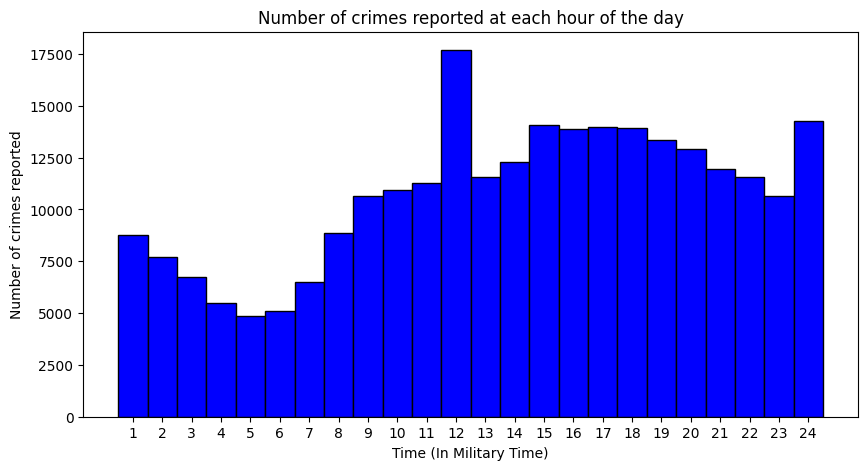

In [69]:
import csv
import numpy as np
import matplotlib.pyplot as plt
#class Crime:
  #def __init__(self, case, date, block, icur, primary, secondary, location, arrest, domestic, beat, ward, fbicd,x,y,lat,long,loc):
    #self.block = block
    #self.secondary = secondary
    #self.primary = primary
with open('Crimes_-_Map.csv', 'r') as csvfile:
  crimecount = {}
  arson = 0
  arsoncount = {}
  my_reader = list(csv.reader(csvfile, delimiter=','))
  for row in my_reader:
    place = row[2]
    if place in crimecount:
      crimecount[place] += 1
    else:
      crimecount[place] = 1
  crimesorted =(sorted(crimecount.items(), key=lambda x:x[1]))
  print(f"{crimesorted[-1][0]} had the most crimes, with {crimesorted[-1][1]} reported in the past year.")
  for row in my_reader:
    if ('ARSON' in row[4]) or ('ARSON' in row[5]):
      place = row[2]
      arson += 1
      if place in arsoncount:
        arsoncount[place] += 1
      else:
        arsoncount[place] = 1
  arsonsorted =(sorted(arsoncount.items(), key=lambda x:x[1]))
  print(f"{arson} arson related crimes reported in the last year.")
  print(f"{arsonsorted[-1][0]} had the most arson related crimes, with {arsonsorted[-1][1]}"
          " reported in the past year.")

  #STILL NEEDS TO MAKE MEANINGFUL GRAPH!!!
  time_list = {}
  for row in my_reader:
    time = str(row[1])
    time_24 = 'none'
    if time[20:21] == "A":
      time_24 = int(time[11:13])
    elif time[20:21] == "P":
      time_24 = int(time[11:13]) + 12
    if time_24 in time_list:
      time_list[time_24] += 1
    else:
      time_list[time_24] = 0
  #print(time_list)
#Plotting time!
#print(list(time_list.values()))
del time_list['none']
time_list_numbers =(sorted(time_list.keys()))
sorted_time_list = {}
for k in time_list_numbers:
  sorted_time_list[str(k)] = time_list[k]
print()

fig = plt.figure(figsize = (10, 5))
plt.bar(sorted_time_list.keys(),list(sorted_time_list.values()), color ='blue', width = 1, edgecolor ='black')
plt.title("Number of crimes reported at each hour of the day")
plt.xlabel("Time (In Military Time)")
plt.ylabel("Number of crimes reported")

## Problem 4 (8 points)  

Complete the implementation of the `Element` class for an atomic element, read the data from elements.csv and create a dictionary, keyed by atomic number for the elements.

4.1  Complete the Element class.  Your class should have instance variables for the element's name, atomic number, abbreviation and atomic weight.  You should include a constructor, a string method and a less than comparison, based on atomic number.

4.2  Read the elements from the csv file elements.csv and create a dictionary keyed by atomic number.  The corresponding value is the created instance of `Element` class.

In [73]:
import csv


elements_table = {}
class Element:
  def __init__(self, name, number, abbr, weight):
    self.name = name
    self.number = number
    self.abbr = abbr
    self.weight = weight
  def __str__(self):
    return(f"Name: {self.name}, Number: {self.number}, Abbr: {self.abbr}, Weight: {self.weight}")
with open('elements.csv', 'r') as csvfile:
    my_reader = list(csv.reader(csvfile, delimiter=','))
    for row in my_reader:
      elements_table[int(row[1])] = str(Element(row[0],row[1],row[2],row[3]))
print(elements_table)

{1: 'Name: Hydrogen, Number: 1, Abbr: H, Weight: 1.01', 2: 'Name: Helium, Number: 2, Abbr: He, Weight: 4', 3: 'Name: Lithium, Number: 3, Abbr: Li, Weight: 6.94', 4: 'Name: Beryllium, Number: 4, Abbr: Be, Weight: 9.01', 5: 'Name: Boron, Number: 5, Abbr: B, Weight: 10.81', 6: 'Name: Carbon, Number: 6, Abbr: C, Weight: 12.01', 7: 'Name: Nitrogen, Number: 7, Abbr: N, Weight: 14.01', 8: 'Name: Oxygen, Number: 8, Abbr: O, Weight: 16', 9: 'Name: Fluorine, Number: 9, Abbr: F, Weight: 19', 10: 'Name: Neon, Number: 10, Abbr: Ne, Weight: 20.18', 11: 'Name: Sodium, Number: 11, Abbr: Na, Weight: 22.99', 12: 'Name: Magnesium, Number: 12, Abbr: Mg, Weight: 24.31', 13: 'Name: Aluminum, Number: 13, Abbr: Al, Weight: 26.98', 14: 'Name: Silicon, Number: 14, Abbr: Si, Weight: 28.09', 15: 'Name: Phosphorus, Number: 15, Abbr: P, Weight: 30.98', 16: 'Name: Sulfur, Number: 16, Abbr: S, Weight: 32.06', 17: 'Name: Chlorine, Number: 17, Abbr: Cl, Weight: 35.45', 18: 'Name: Argon, Number: 18, Abbr: Ar, Weight: 39

Testing code for problem 4.  Call your dictionary `elements_table`.  Run the cell below with modification.

In [74]:
print(f'{type(elements_table)}')
print(f'{type(elements_table[1])}')
print(f'{len(elements_table)}')
for n in range(1,len(elements_table)+1):
    print(elements_table[n])

<class 'dict'>
<class 'str'>
103
Name: Hydrogen, Number: 1, Abbr: H, Weight: 1.01
Name: Helium, Number: 2, Abbr: He, Weight: 4
Name: Lithium, Number: 3, Abbr: Li, Weight: 6.94
Name: Beryllium, Number: 4, Abbr: Be, Weight: 9.01
Name: Boron, Number: 5, Abbr: B, Weight: 10.81
Name: Carbon, Number: 6, Abbr: C, Weight: 12.01
Name: Nitrogen, Number: 7, Abbr: N, Weight: 14.01
Name: Oxygen, Number: 8, Abbr: O, Weight: 16
Name: Fluorine, Number: 9, Abbr: F, Weight: 19
Name: Neon, Number: 10, Abbr: Ne, Weight: 20.18
Name: Sodium, Number: 11, Abbr: Na, Weight: 22.99
Name: Magnesium, Number: 12, Abbr: Mg, Weight: 24.31
Name: Aluminum, Number: 13, Abbr: Al, Weight: 26.98
Name: Silicon, Number: 14, Abbr: Si, Weight: 28.09
Name: Phosphorus, Number: 15, Abbr: P, Weight: 30.98
Name: Sulfur, Number: 16, Abbr: S, Weight: 32.06
Name: Chlorine, Number: 17, Abbr: Cl, Weight: 35.45
Name: Argon, Number: 18, Abbr: Ar, Weight: 39.95
Name: Potassium, Number: 19, Abbr: K, Weight: 39.1
Name: Calcium, Number: 20, A